In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import pandas as pd

# Step 2: Specify the path to your CSV file in Google Drive
#file_path = '/content/drive/MyDrive/DataCoSupplyChainDataset.csv'

# Step 3: Read the CSV file into a Pandas DataFrame
supply = pd.read_csv("DataCoSupplyChainDataset.csv", encoding='ISO-8859-1')

In [ ]:
supply.columns = [col.lower().replace(' ', '_') for col in supply.columns]
supply.rename(columns=lambda x: x.replace("(", "").replace(")", ""), inplace=True)
supply.drop(columns=["customer_email", "customer_fname", "customer_lname", "customer_password", "latitude", "longitude", "product_description", "product_image"], inplace=True)
supply["shipping_date_dateorders"] = pd.to_datetime(supply["shipping_date_dateorders"])
supply["shipping_year"] = supply["shipping_date_dateorders"].dt.year
supply["shipping_day"] = supply["shipping_date_dateorders"].dt.day_name()
supply["shipping_hour"] = supply["shipping_date_dateorders"].dt.hour
supply["late_days"] = supply.days_for_shipping_real - supply.days_for_shipment_scheduled

In [ ]:
##Comparing performance between shipping modes
##Same Day: Shipping on Same Day
##First Class: Shipping within 1 Day
##Second Class: Shipping within 3 Days
##Standard Class: Shipping within 6 Days
total = supply.groupby("shipping_mode", as_index = False).agg(count = ("shipping_mode", "count"))
total

ship_mode = supply.groupby(["shipping_mode", "delivery_status"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))

ship_mode = ship_mode.merge(total, on = "shipping_mode", how = "left")
ship_mode.rename(columns={'count': 'total_number'}, inplace=True)
ship_mode["percentage"] = ship_mode.number/ship_mode.total_number*100

x = ["First Class", "Same Day", "Second Class", "Standard Class"]
for y in x:
    mask = ship_mode[ship_mode["shipping_mode"] == y]
    mask = mask.pivot(index='shipping_mode', columns='delivery_status', values=['percentage'])
    exec(f"{y.lower().replace(' ', '_')} = mask")

ship_mode_graph = pd.concat([first_class, second_class, standard_class, same_day])

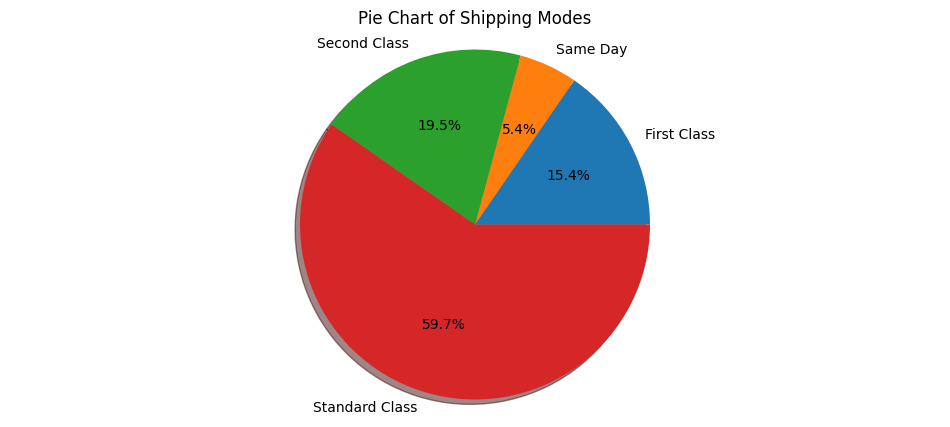

In [ ]:
fig, (ax1) = plt.subplots(1, 1, figsize=(12, 5))
x = total["shipping_mode"]
y = total["count"]
ax1.pie(y,labels=x,  autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
ax1.set_title('Pie Chart of Shipping Modes')
plt.show()

[Text(0, 0, 'Apparel'),
 Text(1, 0, 'Book Shop'),
 Text(2, 0, 'Discs Shop'),
 Text(3, 0, 'Fan Shop'),
 Text(4, 0, 'Fitness'),
 Text(5, 0, 'Footwear'),
 Text(6, 0, 'Golf'),
 Text(7, 0, 'Health and Beauty '),
 Text(8, 0, 'Outdoors'),
 Text(9, 0, 'Pet Shop'),
 Text(10, 0, 'Technology')]

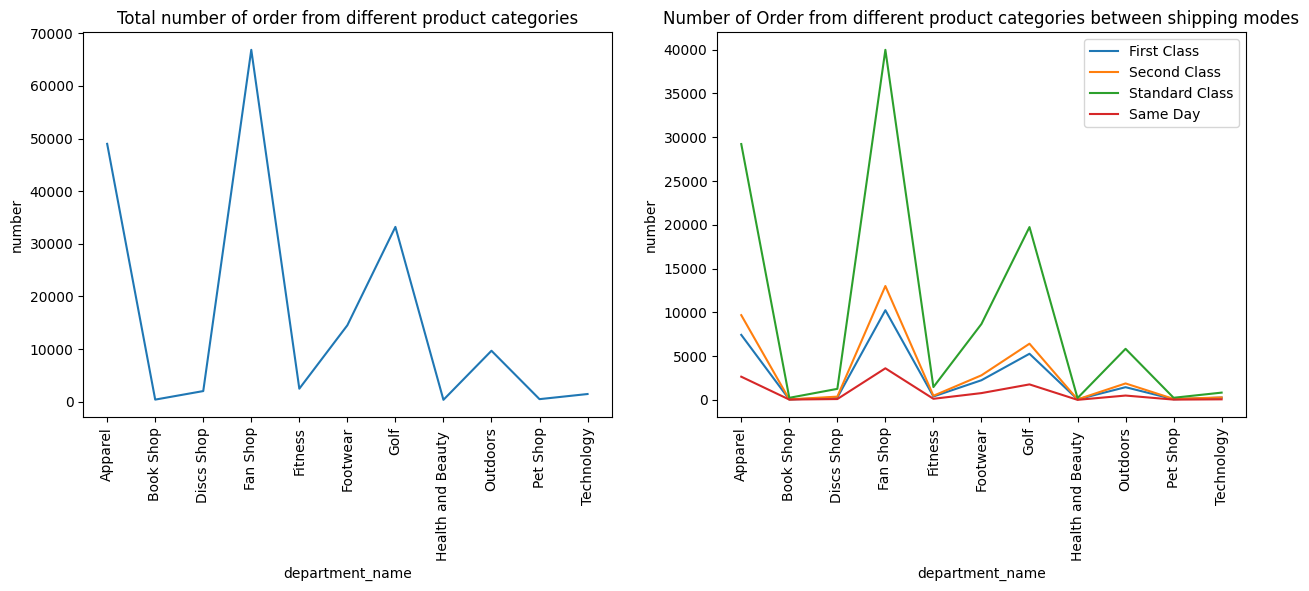

In [ ]:
first_class_department = supply[supply["shipping_mode"] == "First Class"]
first_class_department = first_class_department.groupby(["department_name"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))
second_class_department = supply[supply["shipping_mode"] == "Second Class"]
second_class_department = second_class_department.groupby(["department_name"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))
standard_class_department = supply[supply["shipping_mode"] == "Standard Class"]
standard_class_department = standard_class_department.groupby(["department_name"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))
same_day_department = supply[supply["shipping_mode"] == "Same Day"]
same_day_department = same_day_department.groupby(["department_name"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))
department = supply.groupby(["department_name"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
department = supply.groupby(["department_name"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))
sns.lineplot(x =department["department_name"], y = department["number"], ax=ax1)
ax1.set_title("Total number of order from different product categories")
ax1.set_xticks(range(len(department["department_name"])))
ax1.set_xticklabels(department["department_name"], rotation=90)

sns.lineplot(x = first_class_department['department_name'], y = first_class_department['number'], label='First Class', ax=ax2)
sns.lineplot(x = second_class_department['department_name'], y = second_class_department['number'], label='Second Class', ax=ax2)
sns.lineplot(x = standard_class_department['department_name'], y = standard_class_department['number'], label='Standard Class', ax=ax2)
sns.lineplot(x = same_day_department['department_name'], y = same_day_department['number'], label='Same Day', ax=ax2)
ax2.set_title("Number of Order from different product categories between shipping modes")
ax2.set_xticks(range(len(department["department_name"])))
ax2.set_xticklabels(department["department_name"], rotation=90)

In [ ]:
supply.columns

Index(['type', 'days_for_shipping_real', 'days_for_shipment_scheduled',
       'benefit_per_order', 'sales_per_customer', 'delivery_status',
       'late_delivery_risk', 'category_id', 'category_name', 'customer_city',
       'customer_country', 'customer_id', 'customer_segment', 'customer_state',
       'customer_street', 'customer_zipcode', 'department_id',
       'department_name', 'market', 'order_city', 'order_country',
       'order_customer_id', 'order_date_dateorders', 'order_id',
       'order_item_cardprod_id', 'order_item_discount',
       'order_item_discount_rate', 'order_item_id', 'order_item_product_price',
       'order_item_profit_ratio', 'order_item_quantity', 'sales',
       'order_item_total', 'order_profit_per_order', 'order_region',
       'order_state', 'order_status', 'order_zipcode', 'product_card_id',
       'product_category_id', 'product_name', 'product_price',
       'product_status', 'shipping_date_dateorders', 'shipping_mode',
       'shipping_year', 'shi

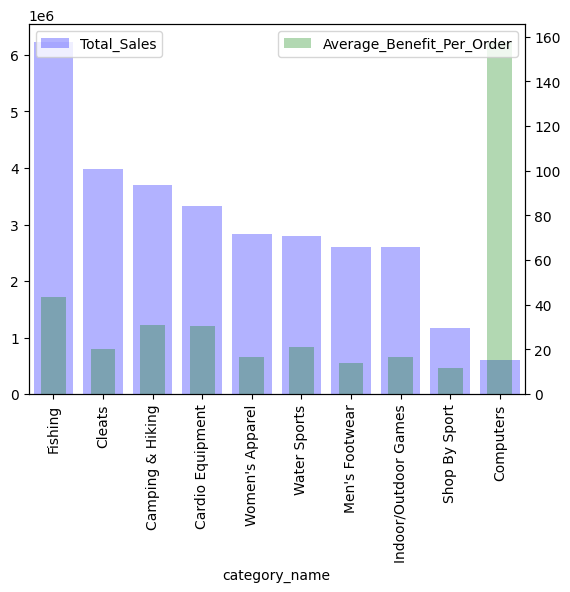

In [ ]:
#What is the relationship between product category and sales performance?¶
category_performance = supply.groupby('category_name').agg(
    Total_Sales=('sales_per_customer', 'sum'),
    Average_Benefit_Per_Order=('benefit_per_order', 'mean')
)

category_performance = category_performance.sort_values(by='Total_Sales', ascending=False)
ax1 = category_performance.Total_Sales.head(10).plot(kind='bar', width=0.8, color='blue', alpha=0.3)
ax2 = ax1.twinx()
category_performance.Average_Benefit_Per_Order.head(10).plot(kind='bar', color='green', width=0.5, alpha=0.3, ax=ax2)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

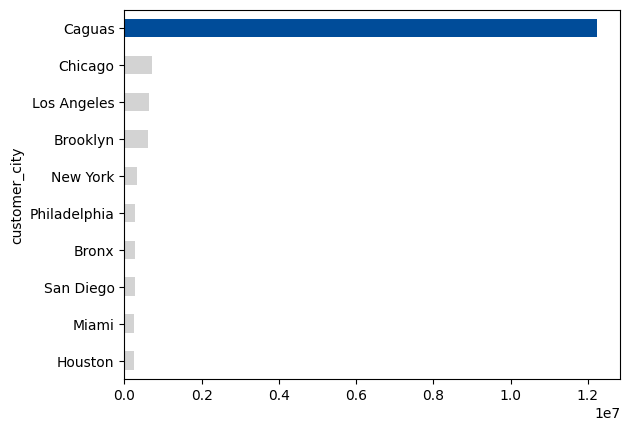

In [ ]:
#cities or regions have the highest sales
ax = supply.groupby('customer_city').sales_per_customer.sum().sort_values(ascending=False).head(10).sort_values().plot(kind='barh', color='lightgray')
bars = ax.patches
bars[-1].set_facecolor('#004c99')

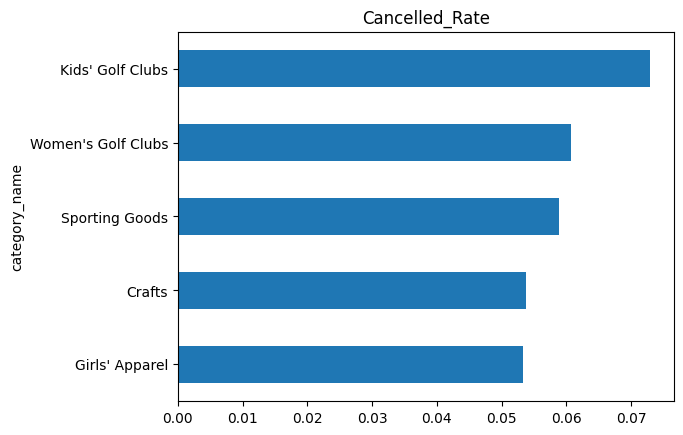

In [ ]:
#the rate of cancellation across product categories
group = supply.groupby(['category_name','delivery_status']).category_name.count().unstack()
group['Total'] = group.sum(axis=1)
group['Canceled_Rate'] = group['Shipping canceled'] / group.Total
ax = group.Canceled_Rate.sort_values(ascending=False).head().plot(kind='barh', title='Cancelled_Rate')
ax.invert_yaxis()

<Axes: xlabel='Days_For_Shipping_Real', ylabel='shipping_mode'>

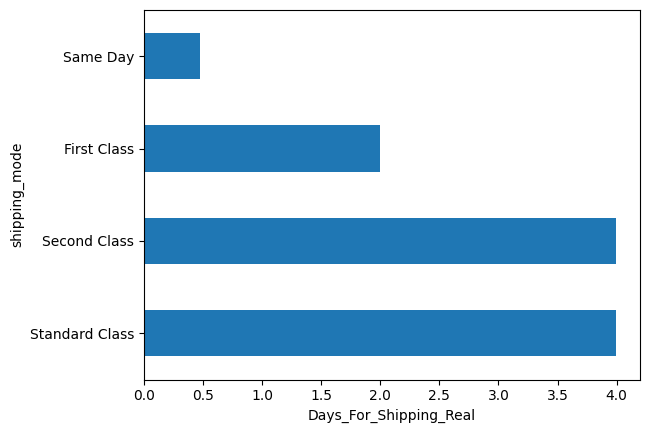

In [ ]:
#seasonal factors and holidays affect sales and shipping performance
supply.groupby('shipping_mode').days_for_shipping_real.mean().sort_values(ascending=False).plot(kind='barh', xlabel='Days_For_Shipping_Real')

In [ ]:
supply.columns

Index(['type', 'days_for_shipping_real', 'days_for_shipment_scheduled',
       'benefit_per_order', 'sales_per_customer', 'delivery_status',
       'late_delivery_risk', 'category_id', 'category_name', 'customer_city',
       'customer_country', 'customer_id', 'customer_segment', 'customer_state',
       'customer_street', 'customer_zipcode', 'department_id',
       'department_name', 'market', 'order_city', 'order_country',
       'order_customer_id', 'order_date_dateorders', 'order_id',
       'order_item_cardprod_id', 'order_item_discount',
       'order_item_discount_rate', 'order_item_id', 'order_item_product_price',
       'order_item_profit_ratio', 'order_item_quantity', 'sales',
       'order_item_total', 'order_profit_per_order', 'order_region',
       'order_state', 'order_status', 'order_zipcode', 'product_card_id',
       'product_category_id', 'product_name', 'product_price',
       'product_status', 'shipping_date_dateorders', 'shipping_mode',
       'shipping_year', 'shi

In [ ]:
train_df = supply.copy()
train_df = train_df.drop(['product_status'
,'customer_street'
,'order_zipcode'
,'order_date_dateorders'
,'shipping_day'
,'shipping_date_dateorders'], axis=1)
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import tensorflow as tf
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, recall_score, f1_score
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import statsmodels.api as sm
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve

In [ ]:
# Data Cleaning: Remove unnecessary rows
data = supply.dropna()  # Drop any rows with missing values

# Feature Selection: Select relevant features
features = ['days_for_shipping_real', 'days_for_shipment_scheduled', 'benefit_per_order',
            'sales_per_customer', 'order_item_discount_rate', 'order_item_product_price',
            'order_item_quantity', 'order_item_total', 'order_profit_per_order',
            'product_price', 'shipping_year', 'shipping_day', 'shipping_hour', 'late_days']

X = data[features]
y = data['late_delivery_risk']

# Convert categorical features to numerical (if needed)
X = pd.get_dummies(X)

# Data Preprocessing: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training: Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Model Evaluation: Make predictions and evaluate the model
y_pred = rf_model.predict(X_test)

# Print accuracy and other metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.976784755770263
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      3266
           1       0.96      1.00      0.98      4186

    accuracy                           0.98      7452
   macro avg       0.98      0.97      0.98      7452
weighted avg       0.98      0.98      0.98      7452



In [ ]:
test_samples = pd.DataFrame({
    'days_for_shipping_real': [3, 5, 7, 2, 6],
    'days_for_shipment_scheduled': [4, 6, 8, 3, 5],
    'benefit_per_order': [10, 20, 15, 12, 18],
    'sales_per_customer': [200, 300, 250, 220, 280],
    'order_item_discount_rate': [0.1, 0.2, 0.15, 0.1, 0.25],
    'order_item_product_price': [30, 40, 35, 25, 45],
    'order_item_quantity': [2, 3, 1, 4, 2],
    'order_item_total': [60, 120, 35, 100, 90],
    'order_profit_per_order': [5, 10, 7, 6, 8],
    'product_price': [50, 60, 55, 45, 65],
    'shipping_year': [2023, 2023, 2024, 2023, 2024],
    'shipping_day': [15, 20, 25, 10, 22],
    'shipping_hour': [10, 14, 18, 9, 16],
    'late_days': [2, 0, 1, 3, 1]
})

# Convert categorical features to numerical (apply same transformation as done on training data)
test_samples = pd.get_dummies(test_samples)

# Ensure that the test samples have the same columns as the training data
test_samples = test_samples.reindex(columns=X.columns, fill_value=0)

# Predict with the model
predictions = rf_model.predict(test_samples)

# Display the predictions
print("Predictions for the 5 test samples:")
for i, prediction in enumerate(predictions, start=1):
    print(f"Sample {i}: {'Late Delivery Risk' if prediction else 'No Late Delivery Risk'}")

Predictions for the 5 test samples:
Sample 1: Late Delivery Risk
Sample 2: No Late Delivery Risk
Sample 3: Late Delivery Risk
Sample 4: Late Delivery Risk
Sample 5: Late Delivery Risk
